## 3.2. KNN

---

In [1]:
import sys
sys.path.insert(1, '../../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split

n_samples = 5
samples = []

for i in range(n_samples):
    dataTrain: pd.DataFrame = pd.read_csv('data/prepared_b_sample/data%d.csv' %i, sep=';')
    dataTest: pd.DataFrame = pd.read_csv('data/prepared_test_sample/data%d.csv' %i, sep=';')
        
    samples.append({'dataTrain': dataTrain, 'dataTest': dataTest})

    dataTest_copy = samples[i]['dataTest'].copy(deep=True)

    for feature in dataTest_copy.columns:
        if feature not in samples[i]['dataTrain'].columns:
            samples[i]['dataTest'] = samples[i]['dataTest'].drop(feature, axis=1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
import ds_functions as ds

target = 'exp'

my_samples=[]

for i in range(n_samples):
    trnY = samples[i]['dataTrain'].pop(target).values
    trnX = samples[i]['dataTrain'].values
    tstY = samples[i]['dataTest'].pop(target).values
    tstX = samples[i]['dataTest'].values
    
    my_samples.append({'X_train': trnX, 'X_test': tstX,
                  'y_train': trnY, 'y_test': tstY})
    
labels = [False, True]

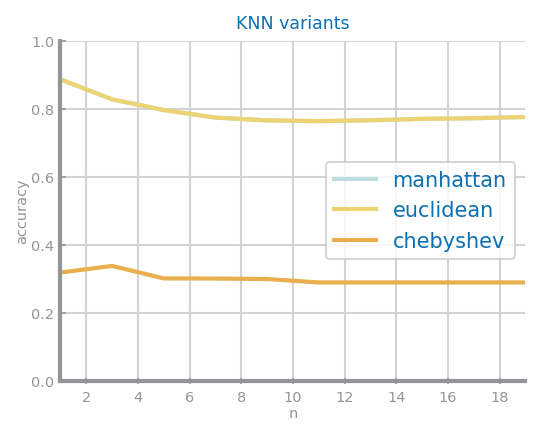

Best accuracy: 0.8865826538176427
Best results with 1 neighbors and manhattan


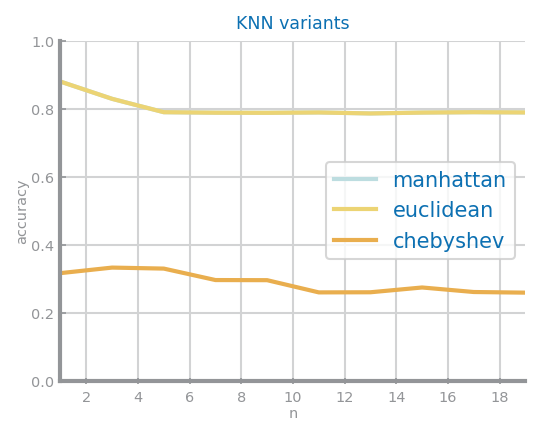

Best accuracy: 0.8799110452186805
Best results with 1 neighbors and manhattan


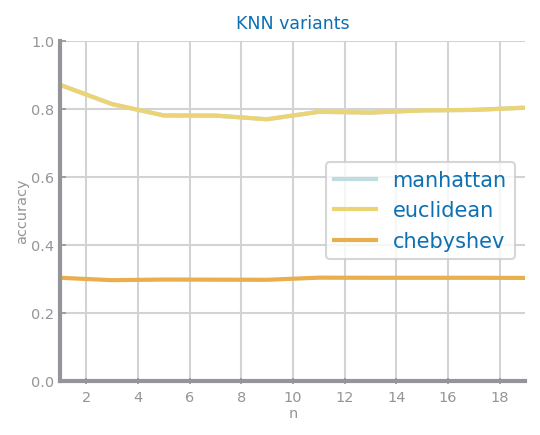

Best accuracy: 0.8699036323202373
Best results with 1 neighbors and manhattan


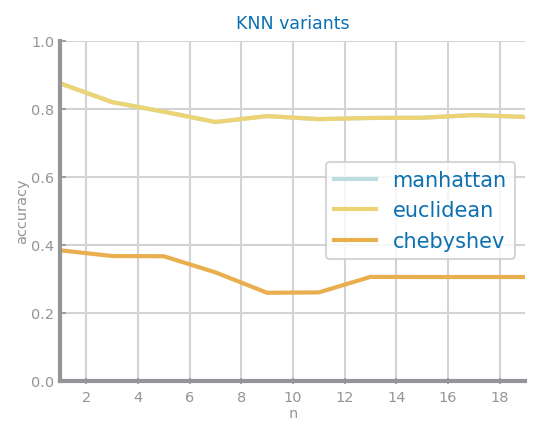

Best accuracy: 0.874351371386212
Best results with 1 neighbors and manhattan


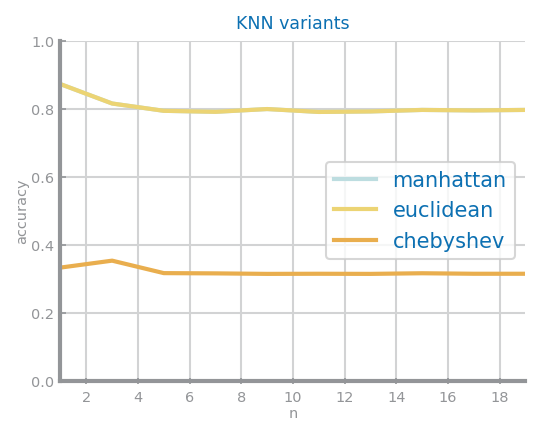

Best accuracy: 0.8724981467753892
Best results with 1 neighbors and manhattan


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

sample_best = []
last_bests = []

for sampl in range(len(my_samples)):
    sample = my_samples[sampl]
    nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
    dist = ['manhattan', 'euclidean', 'chebyshev']
    values = {}
    best = (0, '')
    last_best = 0
    for d in dist:
        yvalues = []
        for n in nvalues:
            knn = KNeighborsClassifier(n_neighbors=n, metric=d)
            knn.fit(sample['X_train'], sample['y_train'])
            prdY = knn.predict(sample['X_test'])
            yvalues.append(metrics.accuracy_score(sample['y_test'], prdY))
            if yvalues[-1] > last_best:
                best = (n, d)
                last_best = yvalues[-1]
        values[d] = yvalues
    sample_best.append(best)
    
    plt.figure()
    ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
    plt.show()
    print("Best accuracy:", last_best)
    last_bests.append(last_best)
    print('Best results with %d neighbors and %s'%(best[0], best[1]))

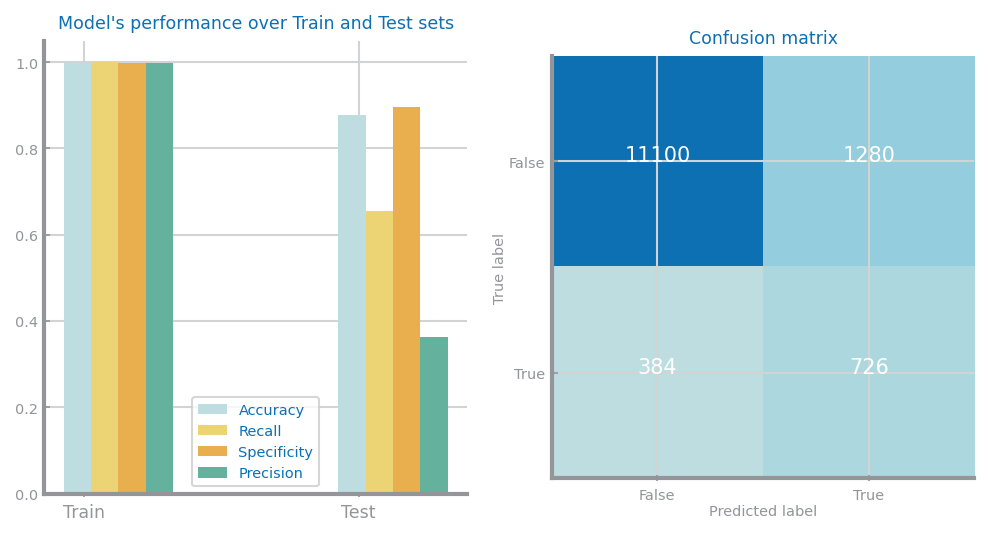

In [4]:
totalYTrn = np.array(())
totalPrd_trn = np.array(())
totalYTst = np.array(())
totalPrd_tst = np.array(())

for sampl in range(len(my_samples)):
    sample = my_samples[sampl]
    best = sample_best[sampl]
    
    clf = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
    clf.fit(sample['X_train'], sample['y_train'])
    
    prd_trn = clf.predict(sample['X_train'])
    totalYTrn = np.concatenate((totalYTrn, sample['y_train']))
    totalPrd_trn = np.concatenate((totalPrd_trn, prd_trn))
    
    prd_tst = clf.predict(sample['X_test'])
    totalYTst = np.concatenate((totalYTst, sample['y_test']))
    totalPrd_tst = np.concatenate((totalPrd_tst, prd_tst))
    
ds.plot_evaluation_results(labels, totalYTrn, totalPrd_trn, totalYTst, totalPrd_tst, showXTickLabels=True)

In [5]:
mean = np.mean(last_bests)
std = np.std(last_bests)
confidences = (0.95, 0.99)
t_st = (1.812, 2.764)


print(f'Mean : {round(mean, 3)}')

for c in range(len(confidences)):
    conf = confidences[c]
    print(f'{int(conf*100)}% cofidence interval for accuracy:')
    minAcc = mean - t_st[c] * std / (10**0.5)
    maxAcc = mean + t_st[c] * std / (10**0.5)
    print(f'[{round(minAcc, 3)},{round(maxAcc, 3)}]')
    
print(metrics.accuracy_score(totalYTst, totalPrd_tst))

Mean : 0.877
95% cofidence interval for accuracy:
[0.873,0.88]
99% cofidence interval for accuracy:
[0.871,0.882]
0.8766493699036323


### Summary

---

***How do models improve with the increase of neighbors?***



***How does performance changes with different distance measures?***



***What is the best parametrisation (number of neighbors and distance measure)?***



***Is the accuracy achieved good enough?***



***What is the largest kind of errors?***



***Is it possible to identify overfitting?***


